<a href="https://colab.research.google.com/github/ankitpaul334/sales-prediction/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales Forecasting Prediction**

Using google colab we imported the data into the system.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sales_prediction.csv to sales_prediction.csv


Using the pandas library, we loaded the necessary dataset into the notebook for runtime use.
pandas alias pd, dataframes are like excel or google colab sheets into x and y columns.
pandas command to read the csv files and convert it into dataframes

# **Loading the Data**

In [ ]:
import pandas as pd
df = pd.read_csv('sales_prediction.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


.head function shows us the first few items on the dataset along with titles

Since we are building a prediction model for the above data, for this we drop the sales column and keep the other columns, use it for prediction of sales.
the seed is set to 42 for reproduction, to keep the accuracy and same results after 1 month or 1 year after multiple uses.
make the model predict the sales column (Y) given the input (X)

# **Build Training and Test Dataset**

In [ ]:
X=df.drop(columns=['Item_Outlet_Sales'])
Y=df['Item_Outlet_Sales']

SEED=42

it is necessary to split the data into training set and testing set to check for the accuracy of the results and efficiency of the training model.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=SEED)

We use train_test_split to split the data for X and Y, test size is set to 30% meaning 30% data will be used for testing and 70% for training the model.

In [ ]:
X_train.shape, X_test.shape

((5966, 11), (2557, 11))

tells us the size in terms of rows and colums that we are using for testing the data and training the model.

Prediction of output for the first 5 rows of data in training set is below

In [ ]:
X_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Snack Foods,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Frozen Foods,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


In [ ]:
Y_train.head(5)

1921     117.8466
655     1230.3984
2229    4933.5780
2537    1789.6704
3528    3872.9586
Name: Item_Outlet_Sales, dtype: float64

# **Basic EDA**

In [ ]:
X_train_c = X_train.copy()

the training data is copied onto the variable for any further modification and explorations.

**Basic EDA** (Exploratory Data Analysis)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


give me the count of missing or null columns in the dataset

In [ ]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

start by EDA for the numeric datatypes by excluding the other datatypes (objects, floats etc)

In [ ]:
num_data = X_train_c.select_dtypes(exclude=['object'])
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


seperated the data to just get the numeric values of the dataframe.
dataframe.select datatype and exclude the objects dtaatype, so it incudes integers and floats here.

In [ ]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


gives us the basic statistics for the data in numeric type. checking the min and max of the values

# **Data Visualization**

Used for data visualization and interacting with the parameters for different results on scenario.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot plots a histogram and then enter the data, which column to visualize and in which position of the subplot to put it in like ax[0]

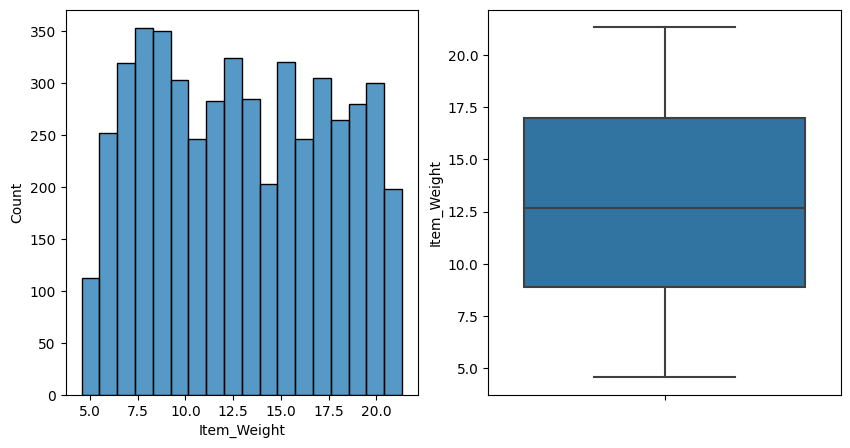

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(10,5))

sns.histplot(data=X_train_c, x='Item_Weight', ax=ax[0]);
sns.boxplot(data=X_train_c, y='Item_Weight', ax=ax[1]);


plt.subplots means a large plot containing subplots, 1 row and 2 columns of the graphs are present. for Univariate analysis, we used histplot (distribution) and boxplot (categorical) from seaborn library

Now we use this code into a reusable function for data visualization below

In [ ]:
def visualize_numeric(data_frame, col_name):
  fig,ax = plt.subplots(1,2, figsize=(10,5))
  sns.histplot(data=data_frame, x=col_name, ax=ax[0]);
  sns.boxplot(data=data_frame, y=col_name, ax=ax[1]);

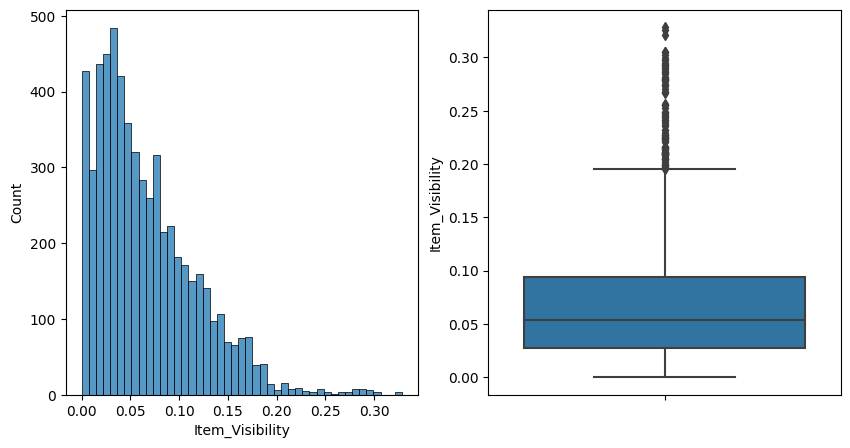

In [ ]:
visualize_numeric(X_train_c,'Item_Visibility')

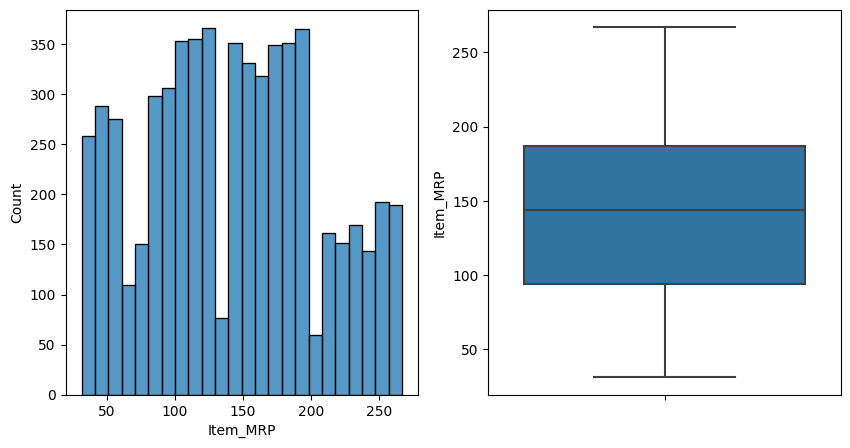

In [ ]:
visualize_numeric(X_train_c,'Item_MRP')

Get the count of outlets established in different years

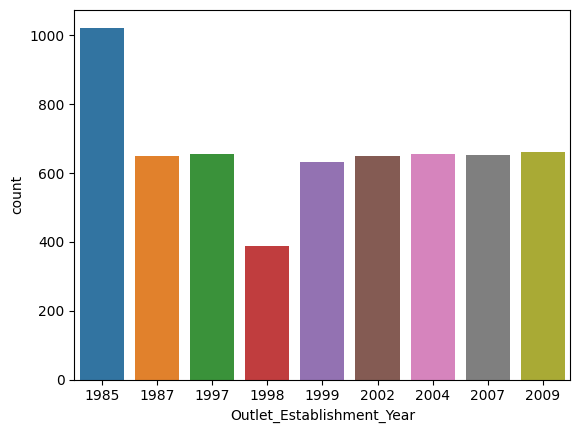

In [ ]:
sns.countplot(data=X_train_c, x='Outlet_Establishment_Year');

Now we will look into the categorical columns which will show me only the object related data and not numeric, int, float etc.

In [ ]:
cat_features = X_train_c.select_dtypes(include=['object'])
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1


total no of rows for every features is described and we have some missing data for the outlet _size colums, all the unique features for each column, checks for high cardinality (many categories), distinct features etc. Item_Identifier has many unique data, so it may concern the features to take into consideration

In [ ]:
cat_features.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,NCI54,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


shows the no of rows of data in each item identifier colums. x items sold in 1 store and not nultiple stores for FDT47 and below items etc.

In [ ]:
cat_features['Item_Identifier'].value_counts()

NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: Item_Identifier, Length: 1543, dtype: int64

here we have some inconsistencies in the data, the low fat is mentioned in different ways, it in necessary to handle the problem and standardize the data. It is necessary to merge them into single categorical string, as model may treat it as different categories.

In [ ]:
cat_features['Item_Fat_Content'].value_counts()

Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64

we have the different items types fruits, snacks etc, showing total no of rows of data and items in it.

In [ ]:
cat_features['Item_Type'].value_counts()

Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: Item_Type, dtype: int64

This data tells that there are around 10 stores that sell items

In [ ]:
cat_features['Outlet_Identifier'].value_counts()

OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT045    649
OUT013    649
OUT049    631
OUT010    389
OUT019    355
Name: Outlet_Identifier, dtype: int64

In [ ]:
cat_features['Outlet_Size'].value_counts()

Medium    1960
Small     1667
High       649
Name: Outlet_Size, dtype: int64

In [ ]:
cat_features['Outlet_Location_Type'].value_counts()

Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: Outlet_Location_Type, dtype: int64

# **Data Wrangling + Feature Engineering**

Creating High level Item Types

In [ ]:
X_train_c['Item_Identifier']

1921    FDN08
655     NCJ42
2229    FDY47
2537    FDN45
3528    FDY16
        ...  
5734    FDY08
5191    FDC41
5390    NCQ53
860     FDL46
7270    NCN30
Name: Item_Identifier, Length: 5966, dtype: object

In [ ]:
X_train_c['Item_Identifier'].apply(lambda x: x[:2]).value_counts()

FD    4269
NC    1137
DR     560
Name: Item_Identifier, dtype: int64

Method to check if trained population and test population distribution is same or not? dist analysis by plotting histograms for live and prev data comparing the dist, or correlation of training vs test feature for same item, KS test to compare distributions etc.

In [ ]:
X_train_c['Item_Identifier'].str[:2].value_counts()

FD    4269
NC    1137
DR     560
Name: Item_Identifier, dtype: int64

For better functioning we use str as apply function can take time to run on larger datasets, string concatenation is faster here.

# **Mapping data from Previous step**

**Step 1: Mapping Item ID into Item types by using a function**

In [ ]:
def create_item_type(data_frame):
  data_frame['Item_Type']=data_frame['Item_Identifier'].str[:2]
  data_frame['Item_Type']=data_frame['Item_Type'].map({
                                                             'FD':'Food',
                                                             'NC':'Non_Consumable',
                                                             'DR': 'Drink'
                                              })
  return data_frame


create a resuable function to apply same steps for training and test data. starting by extracting the item identifiers first 2 char and assign it to new column. Then we transform it into more understandble for working on it using the map function.

In [ ]:
X_train_c = create_item_type(X_train_c)
X_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non_Consumable,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


Now we have a new column item type with the new column values that are renamed

Since item weight has lot of null values we try and fix it by filling the missing values for Item_weight.

In [ ]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

we drop the duplicate values in all of item_weight and sort it by item identifier column. it doesn't remove duplicate is values is different in 2nd column.

In [ ]:
X_train_c[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


DRA59 item weight is available in some stores and not in other outlets. same with NCZ53.

**Step 2: Fill in missing values for Item_Identidier column**

if any item is missing for the data, we take the non  null values for it and fill in the missing values using the function below.

In [ ]:
ITEM_ID_WEIGHT_PIVOT = X_train_c.pivot_table(values='Item_Weight', index= 'Item_Identifier').reset_index()
ITEM_ID_WEIGHT_MAPPING = dict(zip (ITEM_ID_WEIGHT_PIVOT['Item_Identifier'], ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
list (ITEM_ID_WEIGHT_MAPPING.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

If any new value is encountered that is not seen in training data then use item type and weight, take the median and fill in the missing values.

In [ ]:
ITEM_TYPE_WEIGHT_PIVOT = X_train_c.pivot_table(values= 'Item_Weight', index='Item_Type',
                                            aggfunc='median').reset_index()
ITEM_TYPE_WEIGHT_MAPPING = dict(zip (ITEM_TYPE_WEIGHT_PIVOT['Item_Type'], ITEM_TYPE_WEIGHT_PIVOT [ 'Item_Weight']))
ITEM_TYPE_WEIGHT_MAPPING.items()

dict_items([('Drink', 11.8), ('Food', 12.8), ('Non_Consumable', 13.05)])

the above are median values that we can use for filling in missing values.

update item weight column of this dataframe using a function. this is done by filling in nan values from item ID which is mapped to the dictionary above.

In [ ]:
def impute_item_weight (data_frame):
  data_frame.loc[:, 'Item_Weight']= data_frame.loc [:, 'Item_Weight' ].fillna (data_frame.loc[:, 'Item_Identifier' ].map(ITEM_ID_WEIGHT_MAPPING))
  data_frame.loc[:, 'Item_Weight'] = data_frame.loc[:, 'Item_Weight' ]. fillna (data_frame.loc[:, 'Item_Type'].map(ITEM_TYPE_WEIGHT_MAPPING))
  return data_frame

fillna affects rows that have a Nan values only

In [ ]:
X_train_c = impute_item_weight(X_train_c)

In [ ]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Values from the item weight columns are not there anymore that are null. Now we fill in missing values for outlet size column the same way.

In [ ]:
X_train_c.groupby(by=['Outlet_Type','Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

Grocery store and Supermarket type 2 the outlet size is small which values conflicting categories. We check for most frequent values for small using mode of data.

In [ ]:
import pandas as pd
OUTLET_TYPE_SIZE_PIVOT = X_train_c.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode().iloc[0]).reset_index()
print(OUTLET_TYPE_SIZE_PIVOT)

         Outlet_Type Outlet_Size
0      Grocery Store       Small
1  Supermarket Type1       Small
2  Supermarket Type2      Medium
3  Supermarket Type3      Medium


After the above, we are converting the dataframe into a dictionary below

In [ ]:
import pandas as pd

OUTLET_TYPE_SIZE_PIVOT = X_train_c.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode().iloc[0]).reset_index()

OUTLET_TYPE_SIZE_MAPPING = dict (zip (OUTLET_TYPE_SIZE_PIVOT['Outlet_Type'], OUTLET_TYPE_SIZE_PIVOT['Outlet_Size']))
OUTLET_TYPE_SIZE_MAPPING.items ()

dict_items([('Grocery Store', 'Small'), ('Supermarket Type1', 'Small'), ('Supermarket Type2', 'Medium'), ('Supermarket Type3', 'Medium')])

Now we repeat the same process above for Outlet_Size column.

In [ ]:
def impute_outlet_size (data_frame):
  data_frame.loc[:, 'Outlet_Size'] = data_frame.loc [:, 'Outlet_Size'].fillna(data_frame.loc[:, 'Outlet_Type' ].map (OUTLET_TYPE_SIZE_MAPPING))
  return data_frame


In [ ]:
X_train_c = impute_outlet_size (X_train_c)

In [ ]:
X_train_c.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Step 4: Standardizing the Fat Content categories.

> Indented block



In [ ]:
X_train_c['Item_Fat_Content'].value_counts()

Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64

In [ ]:
def standardize_item_fat_content (data_frame):
  data_frame['Item_Fat_Content'] = data_frame[ 'Item_Fat_Content'].replace({
                                              'Low Fat': 'Low_Fat',
                                              'LF': 'Low_Fat',
                                              'reg': 'Regular',
                                              'low fat': 'Low_Fat'
                                    })
  return data_frame

In [ ]:
X_train_c = standardize_item_fat_content (X_train_c)
X_train_c['Item_Fat_Content'].value_counts()

Low_Fat    3860
Regular    2106
Name: Item_Fat_Content, dtype: int64

**Step 5: Correcting item fat content for non comsumable items.**

In [ ]:
X_train_c.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drink           Low_Fat              517
                Regular               43
Food            Low_Fat             2206
                Regular             2063
Non_Consumable  Low_Fat             1137
dtype: int64

In [ ]:
X_train_c.loc [X_train_c['Item_Type'] == 'Non_Consumables', 'Item_Fat_Content']

Series([], Name: Item_Fat_Content, dtype: object)

Non consumables cannot have a fat content. we check for all rows of data and take fat content item and set it to Non_Edibles.

In [ ]:
def correct_item_fat_content (data_frame):
  data_frame.loc [data_frame['Item_Type'] == 'Non_Consumables', 'Item_Fat_Content'] = 'Non_Edible'
  return data_frame


In [ ]:
X_train_c = correct_item_fat_content (X_train_c)
X_train_c.groupby (by=['Item_Type', 'Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drink           Low_Fat              517
                Regular               43
Food            Low_Fat             2206
                Regular             2063
Non_Consumable  Low_Fat             1137
dtype: int64

In [ ]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


# **Prepare Datasets for ML Model**

In [ ]:
def prepare_dataset(data_frame):
  data_frame = create_item_type(data_frame)
  data_frame = impute_item_weight(data_frame)
  data_frame = impute_outlet_size(data_frame)
  data_frame = standardize_item_fat_content(data_frame)
  data_frame = correct_item_fat_content(data_frame)
  return data_frame

Create item types, fill in the missing values, impute missing values for item size, make fat category consistent, correct the fat items for non consumables.

In [ ]:
X_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
X_train = prepare_dataset(X_train)
X_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

**For testing data**

In [ ]:
X_test.isnull().sum()

Item_Identifier                0
Item_Weight                  440
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  720
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [ ]:
X_test = prepare_dataset(X_test)
X_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# **One Hot Encoding for Categorical Data**

as a baseline for encoding we take a dummy variable for each categorical column. ie each values will have occupy a column which is either 1 or 0.

In [ ]:
cat_feats = X_train.select_dtypes (include= ['object'])
cat_feats.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,NCJ42,Low_Fat,Non_Consumable,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


any unknown categories in the test for future data will be ignored, since training data never saw it.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
ohe_feature_names= ohe.get_feature_names_out (input_features=cat_feats.columns)
ohe_feature_names

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

For our numeric data

In [ ]:
num_feats_train = X_train.select_dtypes(exclude= ['object']).reset_index (drop=True)
num_feats_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,7.72,0.147904,116.6466,1998
1,19.75,0.014301,103.0332,1997
2,8.60,0.054221,129.1310,1985
3,19.35,0.118342,222.6088,2002
4,18.35,0.092150,184.8266,1987


now we transform the categorical data into the one hot encoded format

In [ ]:
cat_feats_train = X_train.select_dtypes (include= ['object'])
X_train_cat_ohe = pd. DataFrame (ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_names)
X_train_cat_ohe.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


Every item id, outlet year etc is one hot encoded in the columns so we have many columns. then we concatenenate numeric and categorical data.

In [ ]:
X_train_final = pd.concat([num_feats_train, X_train_cat_ohe], axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


These are the final training data which is the numeric data concatenated with one hot encoded categoricla data into the same order of columns.

In [ ]:
final_columns = X_train_final.columns.values
final_columns

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

For the test, we seperate numeric data, categorical data, transform using one hot encoder for categorical features, convert to dataframe from numpy array and concatenate the data.

In [ ]:
num_feats_test = X_test.select_dtypes(exclude= ['object']).reset_index (drop=True)
cat_feats_test= X_test.select_dtypes (include= ['object'])
X_test_cat_ohe = pd.DataFrame(ohe.transform (cat_feats_test ).toarray(), columns=ohe_feature_names)
X_test_final = pd.concat([num_feats_test, X_test_cat_ohe], axis=1)
X_test_final = X_test_final[final_columns]
X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# **Modelling**

Y_train is the sales prediction data

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

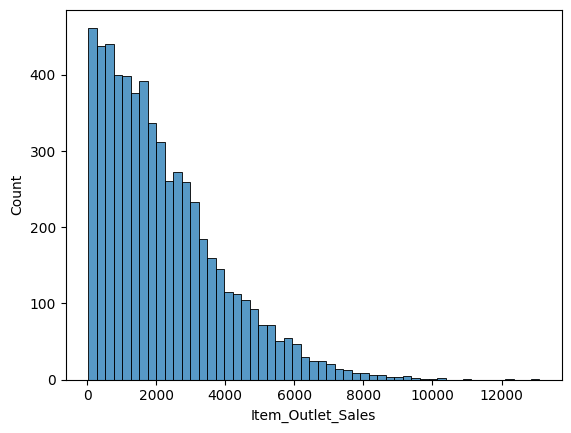

In [ ]:
sns.histplot(Y_train)

Sales is a skewed distribution. Many items are sold b/w 0-2000 etc. So we have a range of values that is used for prediction.

For easier implementation of the model we are using Tree based models like Random Forest Generator and Gradient Boosting.

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as np

Histogram gradient boositing can be used instead of one hot encoding that systematically encodes categorical data. We will also use extreme gradient boosting and regressor valriable for lightgbm.

In [ ]:
def train_and_eval_model(model, X_train, Y_train, cv=5):
  cv_results = cross_validate (model, X_train, Y_train, cv=cv, scoring=('r2', 'neg_root_mean_squared_error'), )
  print('Model:', model)
  r2_scores = cv_results [ 'test_r2']
  print('R2 CV scores:', r2_scores)
  print('R2 CV scores mean/stdev (avg): ', np.mean(r2_scores), '/', np. std (r2_scores))

  #get rms value and convert it to positive
  rmse_scores = cv_results['test_neg_root_mean_squared_error']
  rmse_scores = [-1* score for score in rmse_scores]
  print('RMSE CV scores:', rmse_scores)
  print('RMSE CV scores mean/stdev:', np.mean(rmse_scores), '/', np.std (rmse_scores))

we start by defining a function for the training data, the model that will run on it and a 5 fold cross validation. then, we try to score each model in this notebook showing performance of each model in this notebook using r2 (square) rms value.

scikit learn doesn't have rms value, so we have to convert the negative back to positive value

We take training data and split it into 5 equal parts (5 folds) and train it 5 times on 4 folds and check performance on 1 fold.

In [ ]:
rf = RandomForestRegressor(random_state=SEED)
train_and_eval_model(model=rf, X_train=X_train_final, Y_train=Y_train)

Model: RandomForestRegressor(random_state=42)
R2 CV scores: [0.57180617 0.52721153 0.54237015 0.5525869  0.51622458]
R2 CV scores mean/stdev (avg):  0.5420398640857302 / 0.019409743250955746
RMSE CV scores: [1102.524753140672, 1167.9828352151392, 1181.1734851314827, 1156.5435055401338, 1207.0247905221004]
RMSE CV scores mean/stdev: 1163.0498739099055 / 34.61853767995633


 avg R2 = 0.54 and avg RMSE = 1163.04, with a high standard deviation which is not good.

In [ ]:
hgb=HistGradientBoostingRegressor (random_state=SEED)
train_and_eval_model (model=hgb, X_train=X_train_final, Y_train=Y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV scores: [0.58388983 0.54033287 0.54755752 0.58223783 0.54716116]
R2 CV scores mean/stdev (avg):  0.560235840722721 / 0.018822404148431414
RMSE CV scores: [1086.8567589000188, 1151.6612301389123, 1174.459929973874, 1117.5634249975221, 1167.7936944145083]
RMSE CV scores mean/stdev: 1139.667007684967 / 32.9332964168704


Comparitively the Gradient Boosting model gives us better results. Here the average R2 = 0.58 and RMSE = 1106.21

In [ ]:
gb=GradientBoostingRegressor (random_state=SEED)
train_and_eval_model(model=gb, X_train=X_train_final, Y_train=Y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV scores: [0.60617966 0.59187516 0.57328493 0.60740308 0.54964161]
R2 CV scores mean/stdev (avg):  0.5856768872321926 / 0.02183076748206495
RMSE CV scores: [1057.3462193020523, 1085.1743933109324, 1140.579358607534, 1083.3806323883641, 1164.5909726377847]
RMSE CV scores mean/stdev: 1106.2143152493336 / 39.8520677569976


Best results are shown in extreme gradient boosting with a low standard deviation of 0.02, chances of overfitting for this model is lower.

In [ ]:
xgr = xgb.XGBRegressor (objective='reg:squarederror', random_state=SEED)
train_and_eval_model(model=xgr, X_train=X_train_final, Y_train=Y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV scores: [0.5722618  0.56124852 0.54216909 0.58442259 0.52471549]
R2 CV scores mean/stdev (avg):  0.5569634948570625 / 0.021284782110308577
RMSE CV scores: [1101.938022179983, 1125.1549127000342, 1181.4329294127963, 1114.637349022773, 1196.385

It means on an average you can make a mistake of Rs 1000 when predicting something while having so many high pirce items.
Best results come when Avg RSME are lower and avg R2 scores are higher.

# **Native Handling Approach**

In [ ]:
X_train_copy = X_train.copy().drop (columns= 'Item_Identifier')
cat_cols = X_train_copy.select_dtypes(include= ['object']).columns.tolist()
num_cols = cal_cols = X_train_copy.select_dtypes (exclude= ['object']).columns.tolist ()
#showing categorical and numeric columns
cat_cols, num_cols

(['Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type'],
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'])

we check do we need so many features, we already  have a higher order Item Type for that, so we can try by dropping Item_Identifier column.

In [ ]:
X_train_copy [cat_cols] = X_train_copy[cat_cols].astype('category')
n_categorical_features = len(cat_cols)
n_numerical_features = len(num_cols)
X_train_copy = X_train_copy[cat_cols+num_cols]
X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Fat_Content           5966 non-null   category
 1   Item_Type                  5966 non-null   category
 2   Outlet_Identifier          5966 non-null   category
 3   Outlet_Size                5966 non-null   category
 4   Outlet_Location_Type       5966 non-null   category
 5   Outlet_Type                5966 non-null   category
 6   Item_Weight                5966 non-null   float64 
 7   Item_Visibility            5966 non-null   float64 
 8   Item_MRP                   5966 non-null   float64 
 9   Outlet_Establishment_Year  5966 non-null   int64   
dtypes: category(6), float64(3), int64(1)
memory usage: 269.1 KB


we compute no of categorical and numeric columns, then convert the categorical columns into type category. earlier they were of object type and numeric are remained the same. There is no need for OHE.

In [ ]:
X_train.select_dtypes(include=['object']).drop(columns=['Item_Identifier']).head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,Low_Fat,Non_Consumable,OUT046,Small,Tier 1,Supermarket Type1
2229,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
X_train.shape

(5966, 11)

In [ ]:
X_train_final.shape

(5966, 1572)

In [ ]:
X_train_copy.shape

(5966, 10)

In [ ]:
X_train_final.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,...,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000,5966.000000
mean,12.970239,0.065821,141.814242,1997.867248,0.000670,0.000838,0.001006,0.000503,0.000670,0.000335,...,0.108783,0.328528,0.562689,0.275226,0.328025,0.396748,0.124707,0.652531,0.110795,0.111968
std,4.617516,0.051093,62.627609,8.385023,0.025887,0.028940,0.031699,0.022421,0.025887,0.018308,...,0.311393,0.469717,0.496096,0.446666,0.469534,0.489264,0.330414,0.476206,0.313904,0.315353
min,4.555000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.930000,0.026982,94.144250,1987.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.800000,0.053923,143.879900,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,17.000000,0.094350,186.621400,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,21.350000,0.328391,266.888400,2009.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
xgr = xgb.XGBRegressor (objective='reg:squarederror', random_state=SEED)
xgr.fit(X_train_final, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
Y_pred = xgr.predict(X_test_final)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print('R2 scores:', r2_score(Y_test, Y_pred))
print('RMSE Score: ', mean_squared_error(Y_test, Y_pred, squared=False))

R2 scores: 0.5670497249462019
RMSE Score:  1101.2224653061892


![](https://drive.google.com/uc?export=view&id=your_id=1Duh2wkEQVp4rSZ5YoQgdA25856t7mYsV/view?usp=sharing)


![](https://drive.google.com/uc?id=1Duh2wkEQVp4rSZ5YoQgdA25856t7mYsV/view?usp=sharing)
